In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
xlsx = pd.ExcelFile('dublinfootfall2014.xls')
print(xlsx.sheet_names)

['Week 53(2013) -  Week 1 (2014)', 'Week 2 (2014)', 'Week 3 (2014)', 'Week 4 (2014)', 'Week 5 (2014)', 'Week 6 (2014)', 'Week7 (2014)', 'Week 8 (2014)', 'Week 9 (2014)', 'Week 10 (2014)', 'Week 11 (2014)', 'Week 12 (2014)', 'Week 13 (2014)', 'Week 14 (2014)', 'Week 15 (2014)', 'Week 16 (2014)', 'Week 17 (2014)', 'Week 18 (2014)', 'Week 19 (2014)', 'Week 20 (2014)', 'Week 21 (2014)', 'Week 22 (2014)', 'Week 23 (2014', 'Week 24 (2014)', 'Week 25 (2014)', 'Week 26 (2014)', 'Week 27 (2014)', 'Week 28 (2014)', 'Week 29(2014)', 'Week 30 (2014)', 'Week 31 (2014)', 'Week 32 (2014)', 'Week 33 (2014)', 'Week 34 (2014)']


In [27]:
dflist = []
for n in xlsx.sheet_names: #Cycle through the names of each worksheet 
        dflist.append(pd.read_excel(xls, n)) # Use the names to create Dfs and append them to a list
print(len(dflist))

34


In [25]:
path = 'dublinfootfall2014.xls'
#testDF = pd.read_excel(path, header=None)

testDF = dflist[0]

In [26]:
def clean_worksheet(df):
    df.drop(df.index[:3], inplace=True) #Drop the title of the sheet
    df.drop(df.columns[15:],axis=1, inplace=True) # Drop Excess Columns
    df.columns = df.iloc[2] # Make a row with appropriate entries the column headers
    df = df[df.Time != "Time"] #Drop the rows in the time column that say time
    df = df.dropna(subset = ['Time']) # Drop blank rows in the time column
    return df
testDF = clean_worksheet(testDF)
testDF.head()

5,Time,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out
3,Entrance Name: O'Connell Street at Clerys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,00:00:00,181,352,113,150,54,89,118,149,109,144,286,229,196,152
7,01:00:00,46,123,36,58,19,36,36,71,45,69,121,161,85,101
8,02:00:00,22,47,15,38,5,28,12,32,27,51,61,151,69,105
9,03:00:00,5,35,9,25,5,18,14,33,25,43,60,145,31,110


In [6]:
print(len(testDF)) # Length of our cleaned DF

325


In [7]:
# Create a set of DFs that are each 25 rows long. ie the title and 24 hours for each carpark
def sheet_spliter(df):
    newdfs = [df.iloc[25*n:25*(n+1)] for n in range(int(len(df)/25))] 
    return (newdfs)
list_of_dfs = [testDF.iloc[25*n:25*(n+1)] for n in range(int(len(testDF)/25))] 
list_of_dfs = sheet_splitter(testDF)
len(list_of_dfs)

13

In [8]:
OCDF = list_of_dfs[0] # Take one DF as an example
name = OCDF.iloc[0]['Time']
print(name)
OCDF = OCDF.drop(OCDF.index[:1]) # Remove the row with the carpark name
OCDF.head(3)

Entrance Name: O'Connell Street at Clerys


6,Time,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out
7,00:00:00,181,352,113,150,54,89,118,149,109,144,286,229,196,152
8,01:00:00,46,123,36,58,19,36,36,71,45,69,121,161,85,101
9,02:00:00,22,47,15,38,5,28,12,32,27,51,61,151,69,105


In [9]:
# Put the above into a function to apply it to the set of DFs
def name_data_pair(dfList):
    outlist = []
    for df in dfList:
        pair = []
        pair.append(df.iloc[0]['Time'])
        outDF = df.drop(df.index[:1])
        pair.append(outDF)
        outlist.append(pair)
    return outlist

carpark_pairs = name_data_pair(list_of_dfs) # Function applied to our list from above

In [30]:
#combine three previously separate steps into a function to apply them to a DF and transform it
def week_unstack(df):
    steps = list(range(1, 15, 2))
    day_dfs = [df.iloc[:,[0,n,n+1]] for n in steps] # list comprehension walks down steps an pairs in and out data with hours
    outDF = pd.concat(day_dfs) # individual dfs are appended to each other to make a week long DF
    outDF.reset_index(drop=True,inplace=True) #index of the DF is reset
    return outDF  

newOCDF = week_unstack(OCDF) # testing it out on our O'Connell Street DF
print(newOCDF.describe())
print()
print(newOCDF.head(4))

6           Time   In  Out
count        168  168  168
unique        24  156  155
top     11:00:00    5   15
freq           7    5    3

6      Time   In  Out
0  00:00:00  181  352
1  01:00:00   46  123
2  02:00:00   22   47
3  03:00:00    5   35


In [11]:
# apply the unstacking function to our pairs of carpark dfs from above
for c in carpark_pairs:
    c[1] = week_unstack(c[1])

    
carpark_pairs[0]

["Entrance Name: O'Connell Street at Clerys", 6        Time    In   Out
 0    00:00:00   181   352
 1    01:00:00    46   123
 2    02:00:00    22    47
 3    03:00:00     5    35
 4    04:00:00     7    26
 5    05:00:00    41    15
 6    06:00:00   216    62
 7    07:00:00   614   227
 8    08:00:00  1244   527
 9    09:00:00  1194   699
 10   10:00:00  1401   956
 11   11:00:00  1471  1067
 12   12:00:00  1845  1252
 13   13:00:00  2195  1546
 14   14:00:00  2068  1440
 15   15:00:00  2089  1394
 16   16:00:00  2059  1310
 17   17:00:00  2098  1395
 18   18:00:00  1890  1135
 19   19:00:00  1297   842
 20   20:00:00   789   631
 21   21:00:00   651   510
 22   22:00:00   628   411
 23   23:00:00   324   320
 24   00:00:00   113   150
 25   01:00:00    36    58
 26   02:00:00    15    38
 27   03:00:00     9    25
 28   04:00:00     5    14
 29   05:00:00    35    14
 ..        ...   ...   ...
 138  18:00:00  1820  1048
 139  19:00:00  1254   830
 140  20:00:00   744   553
 141  21:0

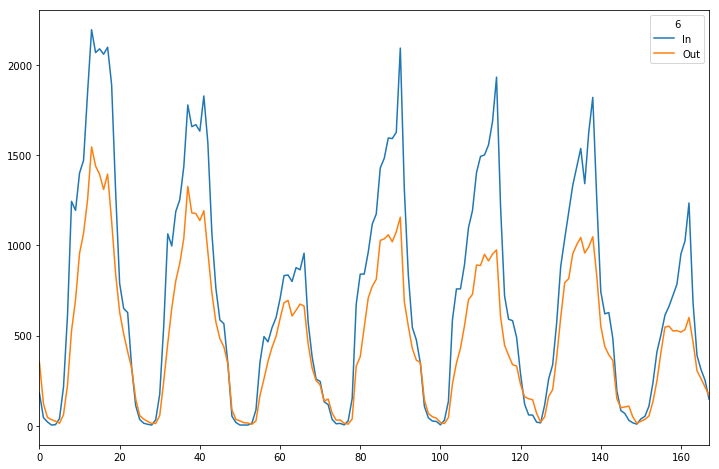

In [12]:
ax = newOCDF.plot(figsize=(12,8), kind="line") # Preliminary plot of foot traffic captured in the area
plt.show()